In [3]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            import numpy as np
import glob
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers, initializers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Add, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from sklearn.utils import shuffle
import PIL.ImageOps
import os

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
img_size = (128,128,1)

Input_img = Input(shape=img_size)  

#encoding architecture
# x1 = Conv2D(64, (3, 3), activation='relu', padding='same', 
#             kernel_initializer=initializers.RandomNormal(stddev=5), bias_initializer='zeros')(Input_img)
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D(padding='same')(x2)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
x6 = MaxPool2D(padding='same')(x5)
x7 = Conv2D(256, (3, 3), activation='relu', padding='same')(x6)
x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
x9 = MaxPool2D(padding='same')(x8)
encoded = Conv2D(512, (3, 3), activation='relu', padding='same')(x9)
#encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x10 = UpSampling2D()(encoded)
x11 = Conv2D(256, (3, 3), activation='relu', padding='same')(x10)
x12 = Conv2D(256, (3, 3), activation='relu', padding='same')(x11)
x13 = Add()([x8, x12])
x14 = UpSampling2D()(x13)
x15 = Conv2D(128, (3, 3), activation='relu', padding='same')(x14)
x16 = Conv2D(128, (3, 3), activation='relu', padding='same')(x15)
x17 = Add()([x5, x16])
x18 = UpSampling2D()(x17)
x19 = Conv2D(64, (3, 3), activation='relu', padding='same')(x18)
x20 = Conv2D(64, (3, 3), activation='relu', padding='same')(x19)
x21 = Add()([x2, x20])
# x3 = UpSampling2D((2, 2))(x3)
# x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
# x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(1, (3, 3), padding='same',activation='relu')(x21)

enc_dec = Model(Input_img, decoded)
# loss_rec = tf.reduce_mean(tf.image.ssim(truth, reconstructed, 2.0))
enc_dec.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

2022-04-29 12:45:03.026399: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-29 12:45:03.027531: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-29 12:45:03.094149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 12:45:03.095509: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.607GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-04-29 12:45:03.095563: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-29 12:45:03.098767: I tensorflow/stream_executor/platfor

In [3]:
enc_dec.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 64)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [4]:
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices('GPU'))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
enc_dec.load_weights('models/SR3_diff_shape_mse_loss_checkpoint.h5')

In [6]:
%cd cruw-devkit

/home/vr-lab/Asish/8th Sem Radar Project/cruw-devkit


In [7]:
from cruw import CRUW
import numpy as np
import matplotlib.pyplot as plt
from cruw.mapping import ra2idx, idx2ra
import math
import os

In [8]:
data_root='/mnt/disk1/CRUW/ROD2021'
dataset = CRUW(data_root=data_root, sensor_config_name='sensor_config_rod2021')


In [9]:
scene_list = os.listdir("/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW/TRAIN_RAD_H/")
scene_list.sort()
print(scene_list)

['2019_04_09_BMS1000', '2019_04_09_BMS1001', '2019_04_09_BMS1002', '2019_04_09_CMS1002', '2019_04_09_PMS1000', '2019_04_09_PMS1001', '2019_04_09_PMS2000', '2019_04_09_PMS3000', '2019_04_30_MLMS000', '2019_04_30_MLMS001', '2019_04_30_MLMS002', '2019_04_30_PBMS002', '2019_04_30_PBMS003', '2019_04_30_PCMS001', '2019_04_30_PM2S003', '2019_04_30_PM2S004', '2019_05_09_BM1S008', '2019_05_09_CM1S004', '2019_05_09_MLMS003', '2019_05_09_PBMS004', '2019_05_09_PCMS002', '2019_05_23_PM1S012', '2019_05_23_PM1S013', '2019_05_23_PM1S014', '2019_05_23_PM1S015', '2019_05_23_PM2S011', '2019_05_29_BCMS000', '2019_05_29_BM1S016', '2019_05_29_BM1S017', '2019_05_29_MLMS006', '2019_05_29_PBMS007', '2019_05_29_PCMS005', '2019_05_29_PM2S015', '2019_05_29_PM3S000', '2019_09_29_ONRD001', '2019_09_29_ONRD002', '2019_09_29_ONRD005', '2019_09_29_ONRD006', '2019_09_29_ONRD011', '2019_09_29_ONRD013']


In [10]:
def normalize(v):
    v_min = v.min(axis=(1, 2), keepdims=True)
    v_max = v.max(axis=(1, 2), keepdims=True)
    return (v - v_min)/(v_max - v_min)

In [13]:
path = '/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW_SR'
if not os.path.exists(path):
    os.mkdir(path)
    
for scene in scene_list:
    scene_path = os.path.join('/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW_SR/',scene)
    if not os.path.exists(scene_path):
        os.mkdir(scene_path)

    img_path = os.path.join('/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW/TRAIN_RAD_H',scene,'RADAR_RA_H')
    images = os.listdir(img_path)
    images.sort()
#     print(images)
    for image in images:
#         words = line.split(" ")
#         seq_num = int(words[0])
#         rng = float(words[1])
#         azm = float(words[2])
#         label = words[3][:-1]

#         rid, aid = ra2idx(rng, azm, dataset.range_grid, dataset.angle_grid)

        img = np.load(os.path.join(img_path,image))
        fimg = np.sqrt(np.sum(np.square(img), axis=2,keepdims=True))
        fimg = np.expand_dims(fimg, axis=0)
        fimg = normalize(fimg)
        fimg =1-fimg
        
        pred1 = enc_dec.predict(fimg)[0]
        
        path = os.path.join(scene_path, image)
        np.save(path,pred1)
    
    print(scene," over")

2019_04_09_BMS1000  over
2019_04_09_BMS1001  over
2019_04_09_BMS1002  over
2019_04_09_CMS1002  over
2019_04_09_PMS1000  over
2019_04_09_PMS1001  over
2019_04_09_PMS2000  over
2019_04_09_PMS3000  over
2019_04_30_MLMS000  over
2019_04_30_MLMS001  over
2019_04_30_MLMS002  over
2019_04_30_PBMS002  over
2019_04_30_PBMS003  over
2019_04_30_PCMS001  over
2019_04_30_PM2S003  over
2019_04_30_PM2S004  over
2019_05_09_BM1S008  over
2019_05_09_CM1S004  over
2019_05_09_MLMS003  over
2019_05_09_PBMS004  over
2019_05_09_PCMS002  over
2019_05_23_PM1S012  over
2019_05_23_PM1S013  over
2019_05_23_PM1S014  over
2019_05_23_PM1S015  over
2019_05_23_PM2S011  over
2019_05_29_BCMS000  over
2019_05_29_BM1S016  over
2019_05_29_BM1S017  over
2019_05_29_MLMS006  over
2019_05_29_PBMS007  over
2019_05_29_PCMS005  over
2019_05_29_PM2S015  over
2019_05_29_PM3S000  over
2019_09_29_ONRD001  over
2019_09_29_ONRD002  over
2019_09_29_ONRD005  over
2019_09_29_ONRD006  over
2019_09_29_ONRD011  over
2019_09_29_ONRD013  over


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

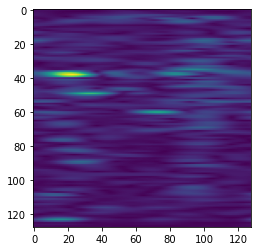

In [31]:
path ="/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW/TRAIN_RAD_H/2019_04_30_MLMS001/RADAR_RA_H/000500_0192.npy"
fimg = np.load(path)
plt.imshow(np.sqrt(np.sum(np.square(fimg), axis=2,keepdims=True)))


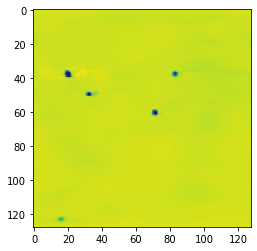

In [29]:
a = np.load("/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW_SR/2019_04_30_MLMS001/000500_0192.npy")
plt.imshow(a)